In [5]:
import numpy as np
from matplotlib import pyplot

### Сгенерируем двумерную выборку по 100 объектов каждого класса.

In [6]:
N_01 = np.random.normal(0,1, (100,2))
N_32 = np.random.normal(3,2, (100,2))
All_object=np.vstack((N_01,N_32))
answer0=np.zeros((100))
answer1=np.ones((100))
All_answer = np.hstack((answer0,answer1))
answer=All_answer.reshape(200,1)
All_Train=np.concatenate((All_object,answer),axis=1)


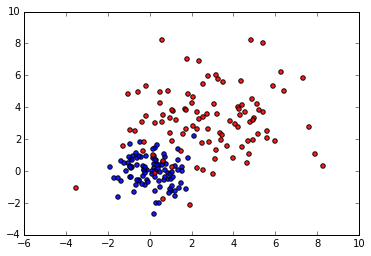

In [7]:
%matplotlib inline
pyplot.scatter(N_01[:,0],N_01[:,1], c = 'b', alpha=0.9)
pyplot.scatter(N_32[:,0],N_32[:,1], c = 'r',alpha=0.9)


### Обучим классификатор одного ближайшего соседа

In [8]:
import sklearn
from sklearn.neighbors import KNeighborsRegressor
clf=sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(All_object,All_answer)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Визуализируем разделяющую поверхность. Для этого построим равномерную сетку точек на плоскости, применим классификатор к каждой точке, и раскрасим точки в цвета, соответствующие полученным классам.

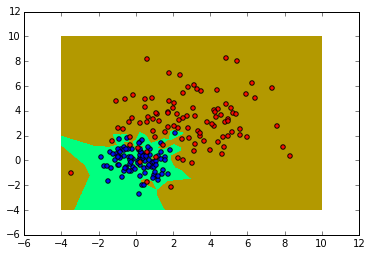

In [10]:
import matplotlib
%matplotlib inline
x=np.arange(-4,10,0.01)
y=np.arange(-4,10,0.01)
a=np.meshgrid(x,y)
a=np.array(a)
a.resize(2,1400*1400)
a=a.transpose()
c=clf.predict(a)
c.resize(1400,1400)
map = matplotlib.cm.get_cmap('Dark2')
cmapInv=matplotlib.colors.ListedColormap([(0,1,0.5,0)] + [(0.7,0.6,0,0)])
pyplot.pcolormesh(x,y,c, cmap=cmapInv, url="string",antialiaseds=False,alpha=0.7)
pyplot.scatter(N_01[:,0],N_01[:,1], c = 'b', alpha=0.9)
pyplot.scatter(N_32[:,0],N_32[:,1], c = 'r',alpha=0.9)

В данном случае разделяющая поверхность сильно подстаивается под выборку, она не устойчива к шуму и к случайным выбросам

### Проделаем предыдущий пункт для классификаторов 5, 10, 25, 50 ближайших соседей. 

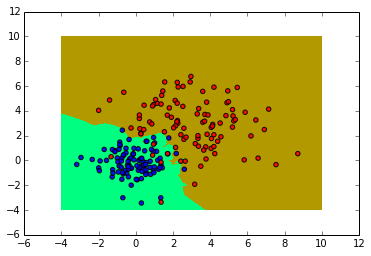

In [69]:
import sklearn
from sklearn.neighbors import KNeighborsRegressor
clf=sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(All_object,All_answer)
%matplotlib inline
x=np.arange(-4,10,0.01)
y=np.arange(-4,10,0.01)
a=np.meshgrid(x,y)
a=np.array(a)
a.resize(2,1400*1400)
a=a.transpose()
c=clf.predict(a)
c=c.astype('int32')
c.resize(1400,1400)
pyplot.pcolormesh(x,y,c, cmap=cmapInv, url="string",antialiaseds=False,alpha=0.7)
pyplot.scatter(N_01[:,0],N_01[:,1], c = 'b', alpha=0.9)
pyplot.scatter(N_32[:,0],N_32[:,1], c = 'r',alpha=0.9)

Для 5 соседей разделяющая более сглаженная, за счет того что случайные выбросы уже почти не влияют на классификацию точек рядом с ними, поэтому данная поверхность менее переобучается и более устойчива к шуму

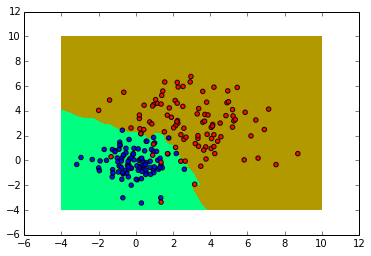

In [70]:
import sklearn
from sklearn.neighbors import KNeighborsRegressor
clf=sklearn.neighbors.KNeighborsClassifier(n_neighbors=10)
clf.fit(All_object,All_answer)
%matplotlib inline
x=np.arange(-4,10,0.01)
y=np.arange(-4,10,0.01)
a=np.meshgrid(x,y)
a=np.array(a)
a.resize(2,1400*1400)
a=a.transpose()
c=clf.predict(a)
c=c.astype('int32')
c.resize(1400,1400)
pyplot.pcolormesh(x,y,c, cmap=cmapInv, url="string",antialiaseds=False,alpha=0.7)
pyplot.scatter(N_01[:,0],N_01[:,1], c = 'b', alpha=0.9)
pyplot.scatter(N_32[:,0],N_32[:,1], c = 'r',alpha=0.9)

Для 10 соседей разделяющая поверхность еще более сглаженная, менее переобучается и более устойчива к шуму, случайные выбросы уже не влияют на классификацию точек рядом с ними

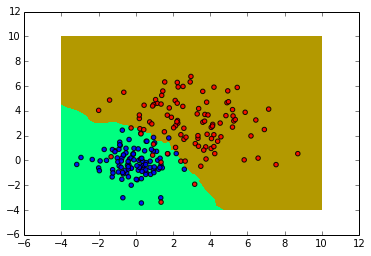

In [71]:

import sklearn
from sklearn.neighbors import KNeighborsRegressor
clf=sklearn.neighbors.KNeighborsClassifier(n_neighbors=25)
clf.fit(All_object,All_answer)
%matplotlib inline
x=np.arange(-4,10,0.01)
y=np.arange(-4,10,0.01)
a=np.meshgrid(x,y)
a=np.array(a)
a.resize(2,1400*1400)
a=a.transpose()
c=clf.predict(a)
c=c.astype('int32')
c.resize(1400,1400)
pyplot.pcolormesh(x,y,c, cmap=cmapInv, url="string",antialiaseds=False,alpha=0.7)
pyplot.scatter(N_01[:,0],N_01[:,1], c = 'b', alpha=0.9)
pyplot.scatter(N_32[:,0],N_32[:,1], c = 'r',alpha=0.9)

Для 25 соседей разделяющая поверхность еще более сглаженная(уже почти похожа на прямую), менее переобучается и более устойчива к шуму, случайные выбросы уже не влияют на классификацию точек рядом с ними, но уже некоторые точки которые лежат на границе она может отнести к случайным выбросам, за счет чего результат может ухудшиться

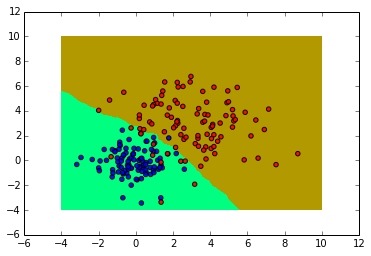

In [72]:
import sklearn
from sklearn.neighbors import KNeighborsRegressor
clf=sklearn.neighbors.KNeighborsClassifier(n_neighbors=50)
clf.fit(All_object,All_answer)
%matplotlib inline
x=np.arange(-4,10,0.01)
y=np.arange(-4,10,0.01)
a=np.meshgrid(x,y)
a=np.array(a)
a.resize(2,1400*1400)
a=a.transpose()
c=clf.predict(a)
c=c.astype('int32')
c.resize(1400,1400)
pyplot.pcolormesh(x,y,c, cmap=cmapInv, url="string",antialiaseds=False,alpha=0.7)
pyplot.scatter(N_01[:,0],N_01[:,1], c = 'b', alpha=0.9)
pyplot.scatter(N_32[:,0],N_32[:,1], c = 'r',alpha=0.9)

Для 50 соседей разделяющая поверхность похожа на прямую, практически не склонна к переобучению и более устойчива к шуму, случайные выбросы уже не влияют на классификацию точек рядом с ними, но теперь уже многие точки которые лежат на границе она может отнести к случайным выбросам, за счет чего результат может ухудшиться еще больше

### Выберем наилучший параметр k (число ближайших соседей) с помощью 5-fold cross-validation.

In [73]:
from sklearn import grid_search
svr=sklearn.neighbors.KNeighborsClassifier()
parameters = {"n_neighbors":[5,10,25,50]}
clf = grid_search.GridSearchCV(svr, parameters, cv=5)
clf.fit(All_object, All_answer)
print(clf.best_params_)

{'n_neighbors': 10}


### Нарисуем график зависимости качества кросс-валидации от числа ближайших соседей.

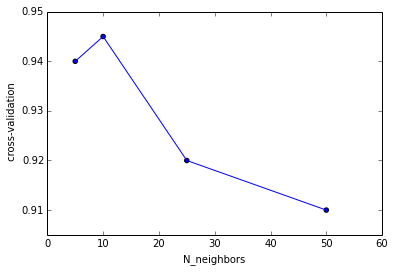

In [74]:
N_neighbors=[5,10,25,50]
a=[]
for i in clf.grid_scores_:
    a.append(i.cv_validation_scores.mean())
%matplotlib inline
pyplot.ylabel(' cross-validation ')
pyplot.xlabel('N_neighbors')
pyplot.scatter(N_neighbors, a)
pyplot.plot(N_neighbors, a)

### Добавим к предыдущему графику доверительные интервалы оценок кросс-валидации

In [75]:
d=[]
for i in clf.grid_scores_:
   d.append(np.sqrt(np.mean((i.cv_validation_scores-i.cv_validation_scores.mean())**2)))

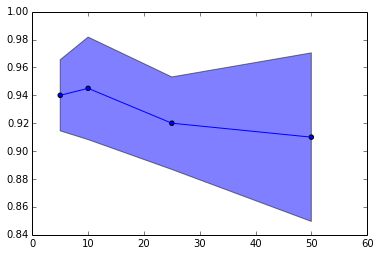

In [76]:
%matplotlib inline
a=np.array(a)
b=np.array(d)
pyplot.fill_between(N_neighbors, a-b, a+b, alpha=0.5)
pyplot.scatter(N_neighbors, a)
pyplot.plot(N_neighbors, a)

### Разделим выборку на обучение и контроль (80% в обучение, 20% в контроль).

In [77]:
from sklearn import cross_validation
C_train, C_test= cross_validation.train_test_split(All_Train,test_size=0.2)

###  Вычислим качество на контроле метода 5NN

In [78]:
from sklearn.neighbors import KNeighborsRegressor
clf=sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(C_train[:,0:2],C_train[:,2])
y_pred=clf.predict(C_test[:,0:2])
y_true=C_test[:,2]

sklearn.metrics.accuracy_score(y_true, y_pred)

0.97499999999999998

###  Умножим второй признак на 100. Вычислим качество метода 5NN на контроле.

In [79]:
#CK2=CK
#CK2[:,1]=CK[:,1]*100
C_train[:,1]*=100
C_test[:,1]*=100
clf=sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(C_train[:,0:2],C_train[:,2])
y_pred=clf.predict(C_test[:,0:2])
y_true=C_test[:,2]

sklearn.metrics.accuracy_score(y_true, y_pred)

0.90000000000000002

### Изменилось ли оно?  Чем можно это объяснить?

Да, оно изменилось. Это можно объяснить тем, что при умножении второго признака на 100, мы по сути растянули график вдоль второго признака. то есть теперь можно считать что второй признак имеет большее значение чем первый.
Пусть есть точка А с признаками (x1,y1) и точки В с признаками (x1+1,y1) и С с признаками(x1,y1+1).
А одинаково удалена от точек В и С, но после умножения второго признака на 100, расстояние между А и В не изменится, а расстояние между А и С сильно увеличится.То есть, если В и С были одними из пяти ближайшими соседями для А, то после умножения второго признака на 100 С может уже и не быть одним из ближайших соседей для А. 
Значит А уже может быть классифицирован по другому, то есть результат может измениться.